In [6]:
import networkx as nx
import random
import matplotlib.pyplot as plt


In [11]:
# Calculating centrality
def calculate_centralities(graph):
    # Degree centrality
    degree = nx.degree_centrality(graph)
    
    
    # Betweenness centrality
    betweenness_centralities = nx.betweenness_centrality(graph)
    
    # Closeness centrality
    closeness_centralities = nx.closeness_centrality(graph)
    
    return betweenness_centralities, closeness_centralities

# Example usage:
# Create a random graph for demonstration
filename = 'amazon2.txt'
graph = nx.read_edgelist(filename)

# Calculate betweenness and closeness centrality
betweenness_centralities, closeness_centralities = calculate_centralities(graph)

# Print results
print("Betweenness centrality:", betweenness_centralities)
print("Closeness centrality:", closeness_centralities)


Node with highest degree centrality: 8 with centrality value: 0.08450704225352113
Node with highest betweenness centrality: 4 with centrality value: 0.3366769642874912
Node with highest closeness centrality: 8 with centrality value: 0.30472103004291845


In [14]:
graph.number_of_nodes()

214

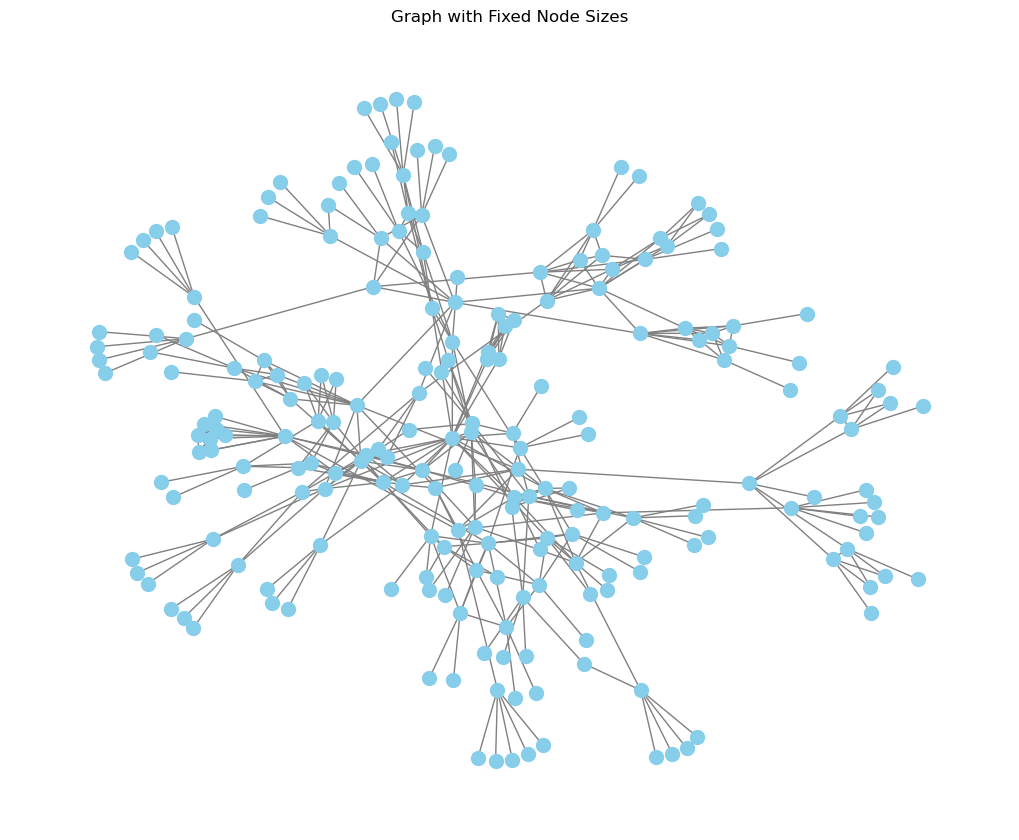

In [16]:
graph = nx.read_edgelist(filename)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Layout for visualization
nx.draw(graph, pos, with_labels=False, node_size=100, node_color='skyblue', edge_color='gray')
plt.title("Graph with Fixed Node Sizes")
plt.show()

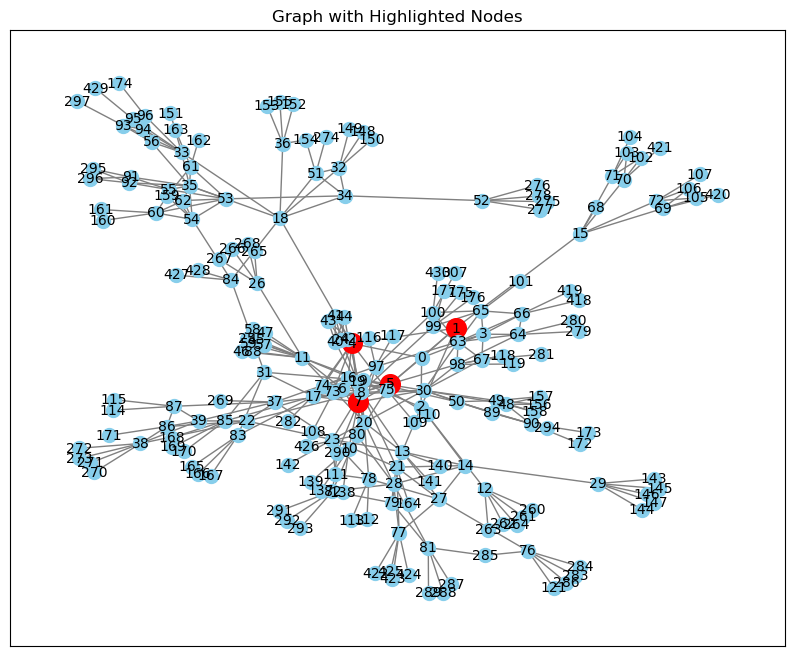

In [18]:
highlight_nodes = ['1', '4', '5', '7']

# Visualize the graph with highlighted nodes
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Layout for visualization

# Draw nodes and edges
nx.draw_networkx_edges(graph, pos, edge_color='gray')

# Draw nodes with different colors for highlighted nodes
nx.draw_networkx_nodes(graph, pos, nodelist=highlight_nodes, node_color='red', node_size=200)
nx.draw_networkx_nodes(graph, pos, nodelist=[node for node in graph.nodes() if node not in highlight_nodes], node_color='skyblue', node_size=100)

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_color='black', font_size=10)

plt.title("Graph with Highlighted Nodes")
plt.show()

In [8]:
# Function to calculate degree, betweenness, and closeness centrality
def calculate_centralities(graph):
    # Degree centrality
    degree_centralities = nx.degree_centrality(graph)
    sorted_degree_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
    
    # Betweenness centrality
    betweenness_centralities = nx.betweenness_centrality(graph)
    sorted_betweenness_nodes = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
    
    # Closeness centrality
    closeness_centralities = nx.closeness_centrality(graph)
    sorted_closeness_nodes = sorted(closeness_centralities, key=closeness_centralities.get, reverse=True)[:10]
    
    return sorted_degree_nodes, sorted_betweenness_nodes, sorted_closeness_nodes

def find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes):
    common_nodes = set(top_degree_nodes).intersection(top_betweenness_nodes, top_closeness_nodes)
    return list(common_nodes)

# Example usage:
# Create a random graph for demonstration
filename = 'amazon1.txt'
graph = nx.read_edgelist(filename)

# Calculate centrality
top_degree_nodes, top_betweenness_nodes, top_closeness_nodes = calculate_centralities(graph)

# Find common nodes
common_nodes = find_common_nodes(top_degree_nodes, top_betweenness_nodes, top_closeness_nodes)
print(common_nodes)
# Print results
print("Top 10 nodes by degree centrality:", top_degree_nodes)
print("Top 10 nodes by betweenness centrality:", top_betweenness_nodes)
print("Top 10 nodes by closeness centrality:", top_closeness_nodes)


['481', '8', '18', '30']
Top 10 nodes by degree centrality: ['8', '18', '346', '33', '78', '481', '63', '99', '11', '30']
Top 10 nodes by betweenness centrality: ['8', '18', '30', '346', '481', '302', '33', '112', '20', '13']
Top 10 nodes by closeness centrality: ['8', '20', '481', '30', '7', '21', '479', '17', '99', '18']


In [7]:
class IndependentCascadeModel:
    def __init__(self, graph):
        self.graph = graph

    def propagate(self, seed_nodes, threshold=0.2):
        active_nodes = set(seed_nodes)
        newly_activated_nodes = set(seed_nodes)
        while newly_activated_nodes:
            next_newly_activated_nodes = set()
            for node in newly_activated_nodes:
                neighbors = list(self.graph.neighbors(node))
                for neighbor in neighbors:
                    if neighbor not in active_nodes:
                        indegree = self.graph.degree(neighbor)
                        propagation_prob = threshold / indegree if indegree > 0 else 0
                        if random.random() < propagation_prob:
                            next_newly_activated_nodes.add(neighbor)
                            active_nodes.add(neighbor)
            newly_activated_nodes = next_newly_activated_nodes
        return active_nodes


independent_cascade_model = IndependentCascadeModel(network)
influenced_nodes = independent_cascade_model.propagate(common_nodes)
# print("Seed nodes:", seed_nodes)
print("Influenced nodes:", influenced_nodes)


Influenced nodes: {'30', '7', '4', '2593', '8', '828', '210'}


In [17]:
# Determining seed set usng greedy approach
def greedy_influence_maximization(network, k):
    seed_set = set()
    while len(seed_set) < k:
        best_node = None
        max_increase = -1
        for node in network.nodes:
            if node not in seed_set:
                # Simulate adding the node to the seed set and calculate influence spread
                current_seed_set = seed_set.copy()
                current_seed_set.add(node)
                influence_spread = simulate_influence_spread(network, current_seed_set)
                increase = influence_spread - len(seed_set)
                if increase > max_increase:
                    max_increase = increase
                    best_node = node
        seed_set.add(best_node)
    return seed_set

# Monte Carlo simulation for influence spread
def simulate_influence_spread(network, seed_set, iterations=10):
    total_influenced = 0
    for _ in range(iterations):
        influenced_nodes = set(seed_set)
        for node in seed_set:
            influenced_nodes.update(nx.node_connected_component(network, node))
        total_influenced += len(influenced_nodes)
    return total_influenced / iterations

In [8]:
# Reading file
def read_graph_from_file(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            # Assuming each line represents an edge in the format "node1 node2"
            nodes = line.strip().split()
            if len(nodes) == 2:
                node1, node2 = nodes
                G.add_edge(node1, node2)
    return G

# Graph
filename = 'amazon2.txt'
network = read_graph_from_file(filename)

seed_set = greedy_influence_maximization(network, 16)
print("Seed set:", seed_set)

Seed set: {'65', '4', '64', '0', '13', '3', '1', '15', '63', '12', '14', '66', '11', '5', '2', '67'}


In [5]:
import networkx as nx
import random

def read_graph_from_file(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            # Assuming each line represents an edge in the format "node1 node2"
            nodes = line.strip().split()
            if len(nodes) == 2:
                node1, node2 = nodes
                G.add_edge(node1, node2)
    return G

class CentralityCalculator:
    def __init__(self, graph):
        self.graph = graph

    def calculate_centrality(self):
        degree_centrality = nx.degree_centrality(self.graph)
        betweenness_centrality = nx.betweenness_centrality(self.graph)
        closeness_centrality = nx.closeness_centrality(self.graph)
        return degree_centrality, betweenness_centrality, closeness_centrality

    def select_seed_nodes(self):
        degree_centrality, betweenness_centrality, closeness_centrality = self.calculate_centrality()
        total_nodes = len(self.graph.nodes)
        num_selected_nodes = int(total_nodes * 0.2)  # Select 20% of total nodes
        sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:num_selected_nodes]
        sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:num_selected_nodes]
        sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:num_selected_nodes]
        selected_nodes = set([node[0] for node in sorted_degree])
        selected_nodes.intersection_update([node[0] for node in sorted_betweenness])
        selected_nodes.intersection_update([node[0] for node in sorted_closeness])
        return selected_nodes

class IndependentCascadeModel:
    def __init__(self, graph):
        self.graph = graph

    def propagate(self, seed_nodes, threshold=0.2):
        active_nodes = set(seed_nodes)
        newly_activated_nodes = set(seed_nodes)
        while newly_activated_nodes:
            next_newly_activated_nodes = set()
            for node in newly_activated_nodes:
                neighbors = list(self.graph.neighbors(node))
                for neighbor in neighbors:
                    if neighbor not in active_nodes:
                        indegree = self.graph.degree(neighbor)
                        propagation_prob = threshold / indegree if indegree > 0 else 0
                        if random.random() < propagation_prob:
                            next_newly_activated_nodes.add(neighbor)
                            active_nodes.add(neighbor)
            newly_activated_nodes = next_newly_activated_nodes
        return active_nodes

if __name__ == "__main__":
    filename = 'amazon1.txt'
    network = read_graph_from_file(filename)
    centrality_calculator = CentralityCalculator(network)
    seed_nodes = centrality_calculator.select_seed_nodes()
    independent_cascade_model = IndependentCascadeModel(network)
    influenced_nodes = independent_cascade_model.propagate(seed_nodes)
    print("Seed nodes:", seed_nodes)
    print("Influenced nodes:", influenced_nodes)


Seed nodes: {'204', '612', '768', '248', '837', '161', '231', '34', '243', '302', '21', '452', '556', '141', '28', '534', '164', '367', '427', '18', '99', '450', '336', '540', '342', '480', '98', '31', '445', '8', '27', '150', '167', '481', '186', '149', '6', '111', '479', '151', '35', '9', '403', '449', '158', '83', '368', '7', '303', '617', '333', '212', '317', '210', '874', '76', '77', '482', '38', '512', '290', '23', '346', '238', '160', '33', '176', '318', '116', '244', '337', '30', '100', '17', '241', '237', '112', '305', '202', '372', '133', '632', '14', '4', '78', '48', '183', '93', '80', '22', '103', '725', '154', '398', '854', '97', '201', '696', '20', '294', '964', '314', '2', '877', '86', '5', '114', '331', '370', '366', '785', '82', '13', '330', '84', '223', '11', '81', '135', '819', '719', '473', '319', '67', '404', '148', '752', '421', '63', '228', '37'}
Influenced nodes: {'204', '608', '612', '768', '248', '837', '161', '1648', '231', '34', '243', '302', '21', '429', '4